In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from numpy.linalg import eig
from sympy import solve
from sympy.abc import a, b

## Собственные числа и вектора

In [63]:
M = np.array([[-101, 250], 
              [40, -101]])
w,v=eig(M)
v = [[5/2,1],[-5/2,1]]
print('Eigen-value:', w)
print('Eigen-vectors', v)

Eigen-value: [  -1. -201.]
Eigen-vectors [[2.5, 1], [-2.5, 1]]


## Аналитическое решение

In [64]:
def find_constants(v,w,A,B):
    constants = solve([a*v[0][0]+b*v[1][0]-A, a*v[0][1]+b*v[1][1]-B], a, b, dict=False)
    return constants[a],constants[b]

In [65]:
def analytic_solution(w,v,A,B,x):
    c1, c2 = find_constants(v,w,A,B)
    y1 = c1*v[0][0]*math.exp(x*w[0])+c2*v[1][0]*math.exp(x*w[1])
    y2 = c1*v[0][1]*math.exp(x*w[0])+c2*v[1][1]*math.exp(x*w[1])
    return y1,y2

In [66]:
def analytic_points(w,v,A,B,x):
        x1 = np.linspace(0,x,11)
        y1 = []; y2 = []
        for x in x1:
                res1,res2 = analytic_solution(w,v,A,B,x)
                y1.append(res1); y2.append(res2)
        return x1,y1,y2

## Явный метод Эйлера 1 порядка

In [67]:
def iteration(y01,y02,f,g,x,h):
    if x != 0:
        y1 = y01 + h*f
        y2 = y02 + h*g
    else:
        y1 = y01
        y2 = y02
    dy1 = -101*y1+250*y2
    dy2 = 40*y1-101*y2
    return y1,y2,dy1,dy2

In [68]:
def Euler(A,B,x,n):
    h = x/n
    print("Щаг: ",h)
    dy1 = lambda y1,y2:-101*y1+250*y2
    dy2 = lambda y1,y2: 40*y1-101*y2
    dy01 = dy1(A,B)
    dy02 = dy2(A,B)
    y1 = []; y2 = [];
    x1 = np.linspace(0,x,11)
    x2 = np.linspace(0,x,n+1)
    for x in x2:
        A,B,dy01,dy02 = iteration(A,B,dy01,dy02,x,h)
        for i in x1:
            if abs(i-x) < 10**(-12):
                y1.append(A); y2.append(B)
    return x1,y1,y2

## Таблица результатов

Щаг:  1e-05


,x,y1 аналит.,y1 числ.,y1 числ.- y1 аналит.,y2 аналит.,y2 числ.,y2 числ.- y2 аналит.
0,0.0,2.50000000000000,2.500000,0,1.00000000000000,1.000000,0
1,0.1,2.26209354508990,2.262092,1.13105401711167e-6,0.904837418035961,0.904837,4.52421610397380e-7
2,0.2,2.04682688269496,2.046825,2.04683949878159e-6,0.818730753077984,0.818730,8.18735799934522e-7
3,0.3,1.85204555170430,1.852043,2.77808476334407e-6,0.740818220681721,0.740817,1.11123390489354e-6
4,0.4,1.67580011508911,1.675797,3.35161923215033e-6,0.670320046035643,0.670319,1.34064769208297e-6
5,0.5,1.51632664928159,1.516323,3.79083716106621e-6,0.606530659712638,0.606529,1.51633486455971e-6
6,0.6,1.37202909023508,1.372025,4.11610854578193e-6,0.548811636094031,0.548810,1.64644341849041e-6
7,0.7,1.24146325947854,1.241459,4.34514278135900e-6,0.496585303791414,0.496584,1.73805711189967e-6
8,0.8,1.12332241029307,1.123318,4.49331062424285e-6,0.449328964117227,0.449327,1.79732424931967e-6
9,0.9,1.01642414935151,1.016420,4.57392888497665e-6,0.406569659740604,0.406568,1.82957155436814e-6


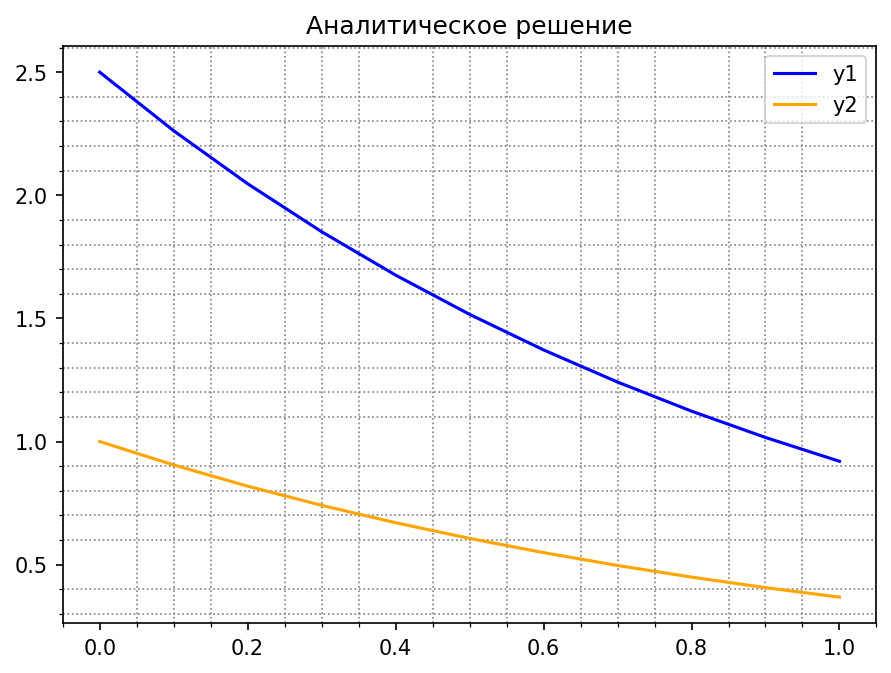

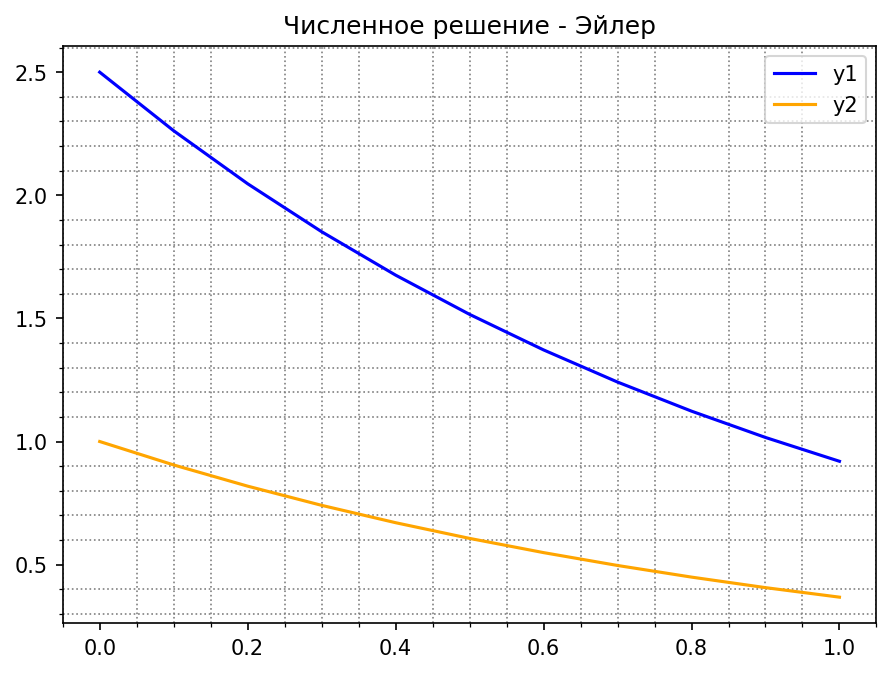

In [69]:
x1, y1, y2 = analytic_points(w,v,v[0][0],v[0][1],1)
x1_eil, y1_eil, y2_eil = Euler(v[0][0],v[0][1],1,10**5)

delta1 = []; delta2 = []
for i in range(len(y1)):
    delta1.append(abs(y1[i] - y1_eil[i]))
    delta2.append(abs(y2[i] - y2_eil[i]))
    
df = pd.DataFrame({"x": x1, "y1 аналит.": y1, "y1 числ. ": y1_eil,"y1 числ.- y1 аналит. ": delta1,"y2 аналит.": y2, "y2 числ. ": y2_eil,
                    "y2 числ.- y2 аналит.": delta2})
display(df)

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.plot(x1,y1, color = "blue",label = 'y1')
ax.plot(x1,y2, color = "orange",label = "y2")
plt.title("Аналитическое решение")
plt.minorticks_on()
plt.grid(which='major',
         color = 'grey', 
            linewidth = 0.7)
plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')
ax.legend()
plt.grid()

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.plot(x1_eil,y1_eil, color = "blue",label = 'y1')
ax.plot(x1_eil,y2_eil, color = "orange",label = "y2")
plt.title("Численное решение - Эйлер")
plt.minorticks_on()
plt.grid(which='major',
         color = 'grey', 
            linewidth = 0.7)
plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')
ax.legend()
plt.grid()

## Устойчивость

In [70]:
def calculate_h(lambda1,lambda2):
    return 2/max(abs(lambda1),abs(lambda2))

In [71]:
h = calculate_h(-1,-201)
print("Метод устойчив при щаге меньшем чем: ",h)

Метод устойчив при щаге меньшем чем:  0.009950248756218905


## Рунге Кутта 4 порядка

In [72]:
def runge_iteration(y1,y2,h,x):
    if x == 0:
        return y1,y2
    def f1(y1,y2):
        return -101*y1+250*y2
    def f2(y1,y2):
        return 40*y1-101*y2
    h2 = h / 2
    k1 = f1(y1, y2)
    k2 = f1(y1 + h2, y2 + h2 * k1)
    k3 = f1(y1 + h2, y2 + h2 * k2)
    k4 = f1(y1 + h, y2 + h * k3)
    yn1 = y1 + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    k1 = f2(y1, y2)
    k2 = f2(y1 + h2, y2 + h2 * k1)
    k3 = f2(y1 + h2, y2 + h2 * k2)
    k4 = f2(y1 + h, y2 + h * k3)
    yn2 = y2 + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return yn1,yn2

In [73]:
def RK4(A,B,x,n):
    h = x/n
    print("Щаг: ",h)
    dy1 = lambda y1,y2:-101*y1+250*y2
    dy2 = lambda y1,y2: 40*y1-101*y2
    dy01 = dy1(A,B)
    dy02 = dy2(A,B)
    y1 = []; y2 = [];
    x1 = np.linspace(0,x,11)
    x2 = np.linspace(0,x,n+1)
    for x in x2:
        A,B = runge_iteration(A,B,h,x)
        for i in x1:
            if abs(i-x) < 10**(-12):
                y1.append(A); y2.append(B)
    return y1,y2

Щаг:  0.003125
0.0777833689513289
0.0294896345178149


,x,y1 аналит.,y1 числ.,y1 числ.- y1 аналит.,y2 аналит.,y2 числ.,y2 числ.- y2 аналит.
0,0.0,2.50000000000000,2.500000,0,1.00000000000000,1.000000,0
1,0.1,2.26209354508990,2.237087,0.0250067202970925,0.904837418035961,0.897895,0.00694252073355395
2,0.2,2.04682688269496,2.006250,0.0405767300128486,0.818730753077984,0.805305,0.0134258962903946
3,0.3,1.85204555170430,1.799373,0.0526724872438513,0.740818220681721,0.722325,0.0184930646708145
4,0.4,1.67580011508911,1.613969,0.0618314287100954,0.670320046035643,0.647958,0.0223617517595682
5,0.5,1.51632664928159,1.447808,0.0685183807006788,0.606530659712638,0.581310,0.0252203537098775
6,0.6,1.37202909023508,1.298894,0.0731346969819111,0.548811636094031,0.521580,0.0272316217461545
7,0.7,1.24146325947854,1.165437,0.0760262958526461,0.496585303791414,0.468049,0.0285359035491994
8,0.8,1.12332241029307,1.045832,0.0774907251109673,0.449328964117227,0.420075,0.0292539930488387
9,0.9,1.01642414935151,0.938641,0.0777833689513289,0.406569659740604,0.377080,0.0294896345178149


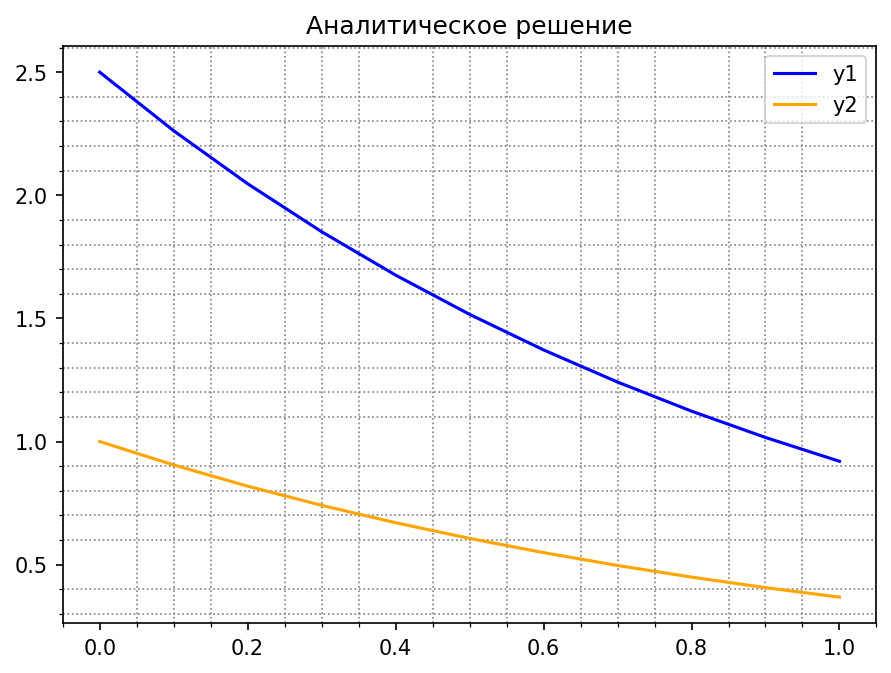

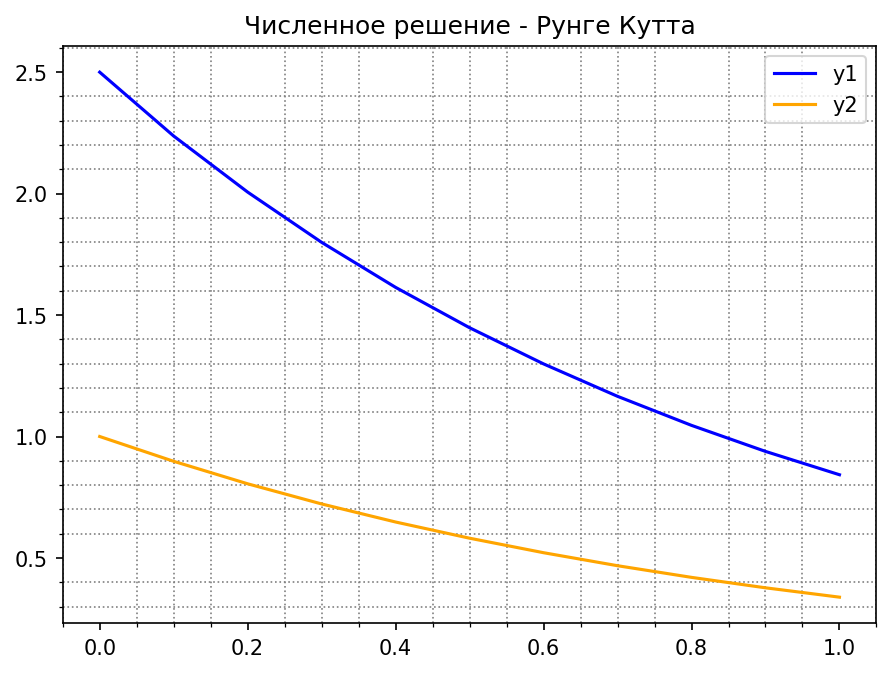

In [83]:
x1, y1, y2 = analytic_points(w,v,v[0][0],v[0][1],1)
y1_runge, y2_runge = RK4(v[0][0],v[0][1],1,320)
delta1 = []; delta2 = []
for i in range(len(y1)):
    delta1.append(abs(y1[i] - y1_runge[i]))
    delta2.append(abs(y2[i] - y2_runge[i]))

print(max(delta1))
print(max(delta2))
df = pd.DataFrame({"x": x1, "y1 аналит.": y1, "y1 числ. ": y1_runge,"y1 числ.- y1 аналит. ": delta1,"y2 аналит.": y2, "y2 числ. ": y2_runge,
                    "y2 числ.- y2 аналит.": delta2})
display(df)

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.plot(x1,y1, color = "blue",label = 'y1')
ax.plot(x1,y2, color = "orange",label = "y2")
plt.title("Аналитическое решение")
plt.minorticks_on()
plt.grid(which='major',
         color = 'grey', 
            linewidth = 0.7)
plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')
ax.legend()
plt.grid()

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.plot(x1,y1_runge, color = "blue",label = 'y1')
ax.plot(x1,y2_runge, color = "orange",label = "y2")
plt.title("Численное решение - Рунге Кутта")
plt.minorticks_on()
plt.grid(which='major',
         color = 'grey', 
            linewidth = 0.7)
plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')
ax.legend()
plt.grid()